In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import encodings

from matplotlib.gridspec import GridSpec
from matplotlib.offsetbox import AnchoredText
from matplotlib.backends.backend_pdf import PdfPages

import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv('A:\\Data Analysis Jupyter\\Water-Quality-Analysis\\data.csv', encoding = "latin1")

In [9]:
df.head(3)

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,1/4/2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,1/4/2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,1/4/2009


In [10]:
df['Year'] = pd.to_datetime(df['Year'])

In [11]:
df['Session'] = df['Year'].dt.year

In [15]:
df.head()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year,Session
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,2009-01-04,2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,2009-01-04,2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,2009-01-04,2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,2009-01-04,2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,2009-01-04,2009


In [16]:
df.drop('Year',axis=1,inplace=True)

In [17]:
df.head()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Session
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,2009


In [18]:
df.rename(columns={'Session':'Year'}, inplace = True)

In [19]:
df.head(2)

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,2009


In [20]:
df.to_csv("updated-wq.csv", index = True)

In [21]:
df.columns

Index(['State Name', 'District Name', 'Block Name', 'Panchayat Name',
       'Village Name', 'Habitation Name', 'Quality Parameter', 'Year'],
      dtype='object')

In [22]:
df['State Name'].unique()

array(['ANDHRA PRADESH', 'ASSAM', 'ARUNACHAL PRADESH', 'BIHAR', 'GUJARAT',
       'HARYANA', 'HIMACHAL PRADESH', 'JAMMU AND KASHMIR', 'KARNATAKA',
       'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'MEGHALAYA', 'NAGALAND',
       'ORISSA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'WEST BENGAL', 'CHATTISGARH',
       'JHARKHAND', 'UTTARAKHAND', 'MANIPUR', 'CHHATTISGARH'],
      dtype=object)

In [24]:
len(df['State Name'].unique())

27

In [26]:
df['Quality Parameter'].groupby(df['State Name']).describe()

,count,unique,top,freq
State Name,,,,
ANDHRA PRADESH,2888,2,Fluoride,2193
ARUNACHAL PRADESH,612,1,Iron,612
ASSAM,79910,3,Iron,74098
BIHAR,92336,4,Iron,69970
CHATTISGARH,25062,5,Iron,24439
CHHATTISGARH,8815,3,Iron,8339
GUJARAT,2092,4,Fluoride,804
HARYANA,262,2,Fluoride,244
HIMACHAL PRADESH,88,3,Salinity,72


In [27]:
df['Year'].groupby(df['State Name']).describe()

,count,mean,std,min,25%,50%,75%,max
State Name,,,,,,,,
ANDHRA PRADESH,2888.0,2010.096953,1.059186,2009.0,2009.0,2010.0,2011.00,2012.0
ARUNACHAL PRADESH,612.0,2009.928105,1.093678,2009.0,2009.0,2010.0,2010.00,2012.0
ASSAM,79910.0,2010.300989,1.129517,2009.0,2009.0,2010.0,2011.00,2012.0
BIHAR,92336.0,2010.137303,1.091053,2009.0,2009.0,2010.0,2011.00,2012.0
CHATTISGARH,25062.0,2009.978693,0.804317,2009.0,2009.0,2010.0,2011.00,2011.0
CHHATTISGARH,8815.0,2012.000000,0.000000,2012.0,2012.0,2012.0,2012.00,2012.0
GUJARAT,2092.0,2009.963193,1.063315,2009.0,2009.0,2010.0,2011.00,2012.0
HARYANA,262.0,2009.561069,0.931614,2009.0,2009.0,2009.0,2010.00,2012.0
HIMACHAL PRADESH,88.0,2009.000000,0.000000,2009.0,2009.0,2009.0,2009.00,2009.0


In [28]:
descQ = df['Quality Parameter'].groupby(df['State Name']).describe()

In [30]:
descQ.to_csv('description.csv', index = True)

In [37]:
data = df[['State Name', 'Quality Parameter']]
data.head(2)

,State Name,Quality Parameter
0,ANDHRA PRADESH,Salinity
1,ANDHRA PRADESH,Fluoride


In [46]:
number = LabelEncoder()
data['Quality'] = number.fit_transform(data['Quality Parameter'].astype('str'))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
data.head(5)

,State Name,Quality Parameter,Quality
0,ANDHRA PRADESH,Salinity,4
1,ANDHRA PRADESH,Fluoride,1
2,ANDHRA PRADESH,Salinity,4
3,ANDHRA PRADESH,Salinity,4
4,ANDHRA PRADESH,Salinity,4


In [66]:
set1 = data.groupby(['State Name', 'Quality Parameter','Quality']).count()

In [67]:
set1

Empty DataFrame
Columns: []
Index: [(ANDHRA PRADESH, Fluoride, 1), (ANDHRA PRADESH, Salinity, 4), (ARUNACHAL PRADESH, Iron, 2), (ASSAM, Arsenic, 0), (ASSAM, Fluoride, 1), (ASSAM, Iron, 2), (BIHAR, Arsenic, 0), (BIHAR, Fluoride, 1), (BIHAR, Iron, 2), (BIHAR, Nitrate, 3), (CHATTISGARH, Arsenic, 0), (CHATTISGARH, Fluoride, 1), (CHATTISGARH, Iron, 2), (CHATTISGARH, Nitrate, 3), (CHATTISGARH, Salinity, 4), (CHHATTISGARH, Fluoride, 1), (CHHATTISGARH, Iron, 2), (CHHATTISGARH, Salinity, 4), (GUJARAT, Fluoride, 1), (GUJARAT, Iron, 2), (GUJARAT, Nitrate, 3), (GUJARAT, Salinity, 4), (HARYANA, Fluoride, 1), (HARYANA, Salinity, 4), (HIMACHAL PRADESH, Arsenic, 0), (HIMACHAL PRADESH, Iron, 2), (HIMACHAL PRADESH, Salinity, 4), (JAMMU AND KASHMIR, Fluoride, 1), (JAMMU AND KASHMIR, Iron, 2), (JAMMU AND KASHMIR, Salinity, 4), (JHARKHAND, Arsenic, 0), (JHARKHAND, Fluoride, 1), (JHARKHAND, Iron, 2), (JHARKHAND, Nitrate, 3), (JHARKHAND, Salinity, 4), (KARNATAKA, Arsenic, 0), (KARNATAKA, Fluoride, 1), (KARNATAKA, Iron, 2), (KARNATAKA, Nitrate, 3), (KARNATAKA, Salinity, 4), (KERALA, Fluoride, 1), (KERALA, Iron, 2), (KERALA, Nitrate, 3), (KERALA, Salinity, 4), (MADHYA PRADESH, Fluoride, 1), (MADHYA PRADESH, Iron, 2), (MADHYA PRADESH, Nitrate, 3), (MADHYA PRADESH, Salinity, 4), (MAHARASHTRA, Arsenic, 0), (MAHARASHTRA, Fluoride, 1), (MAHARASHTRA, Iron, 2), (MAHARASHTRA, Nitrate, 3), (MAHARASHTRA, Salinity, 4), (MANIPUR, Iron, 2), (MEGHALAYA, Fluoride, 1), (MEGHALAYA, Iron, 2), (NAGALAND, Iron, 2), (ORISSA, Arsenic, 0), (ORISSA, Fluoride, 1), (ORISSA, Iron, 2), (ORISSA, Nitrate, 3), (ORISSA, Salinity, 4), (PUDUCHERRY, Iron, 2), (PUDUCHERRY, Salinity, 4), (PUNJAB, Fluoride, 1), (PUNJAB, Iron, 2), (PUNJAB, Salinity, 4), (RAJASTHAN, Arsenic, 0), (RAJASTHAN, Fluoride, 1), (RAJASTHAN, Iron, 2), (RAJASTHAN, Nitrate, 3), (RAJASTHAN, Salinity, 4), (TAMIL NADU, Fluoride, 1), (TAMIL NADU, Iron, 2), (TAMIL NADU, Nitrate, 3), (TAMIL NADU, Salinity, 4), (TRIPURA, Iron, 2), (UTTAR PRADESH, Arsenic, 0), (UTTAR PRADESH, Fluoride, 1), (UTTAR PRADESH, Iron, 2), (UTTAR PRADESH, Nitrate, 3), (UTTAR PRADESH, Salinity, 4), (UTTARAKHAND, Arsenic, 0), (UTTARAKHAND, Fluoride, 1), (UTTARAKHAND, Iron, 2), (UTTARAKHAND, Nitrate, 3), (WEST BENGAL, Arsenic, 0), (WEST BENGAL, Fluoride, 1), (WEST BENGAL, Iron, 2), (WEST BENGAL, Salinity, 4)]

[90 rows x 0 columns]

In [70]:
state_count = pd.DataFrame({'count' : data.groupby(["State Name", "Quality","Quality Parameter"]).size()}).reset_index()

In [73]:
ANDHRA_PRADESH = state_count[state_count["State Name"] == 'ANDHRA PRADESH']
ASSAM = state_count[state_count["State Name"] == 'ASSAM']
ARUNACHAL_PRADESH = state_count[state_count["State Name"] == 'ARUNACHAL PRADESH']
BIHAR = state_count[state_count["State Name"] == 'BIHAR']
GUJRAT = state_count[state_count["State Name"] == 'GUJRAT']

In [74]:
ANDHRA_PRADESH

,State Name,Quality,Quality Parameter,count
0,ANDHRA PRADESH,1,Fluoride,2193
1,ANDHRA PRADESH,4,Salinity,695


Text(0.5,1,'WATER QUALITY IN ANDHRA PRADESH')

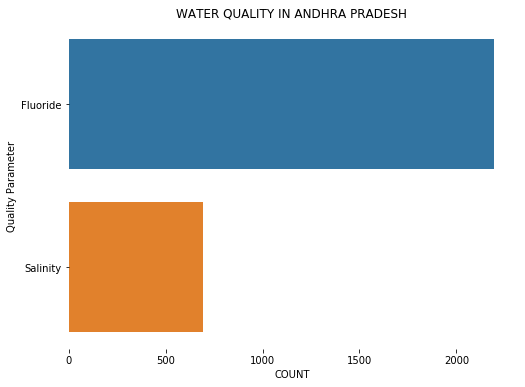

In [75]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='count',y='Quality Parameter',data=ANDHRA_PRADESH)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN ANDHRA PRADESH")

In [76]:
ASSAM

,State Name,Quality,Quality Parameter,count
3,ASSAM,0,Arsenic,4775
4,ASSAM,1,Fluoride,1037
5,ASSAM,2,Iron,74098


Text(0.5,1,'WATER QUALITY IN ASSAM ')

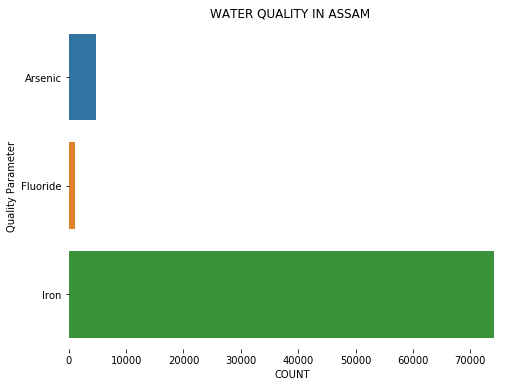

In [77]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='count',y='Quality Parameter',data=ASSAM)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN ASSAM ")

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [79]:
ARUNACHAL_PRADESH

,State Name,Quality,Quality Parameter,count
2,ARUNACHAL PRADESH,2,Iron,612


Text(0.5,1,'WATER QUALITY IN ARUNACHAL PRADESH ')

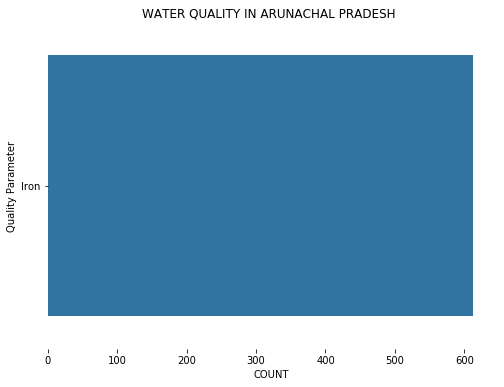

In [81]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='count',y='Quality Parameter',data=ARUNACHAL_PRADESH)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN ARUNACHAL PRADESH ")

In [82]:
BIHAR

,State Name,Quality,Quality Parameter,count
6,BIHAR,0,Arsenic,6215
7,BIHAR,1,Fluoride,16150
8,BIHAR,2,Iron,69970
9,BIHAR,3,Nitrate,1


Text(0.5,1,'WATER QUALITY IN BIHAR ')

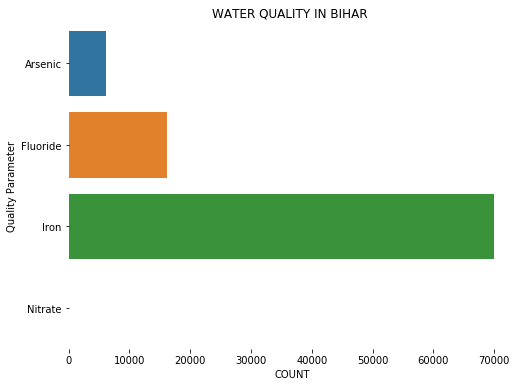

In [83]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='count',y='Quality Parameter',data=BIHAR)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN BIHAR ")

In [84]:
GUJRAT

,State Name,Quality,Quality Parameter,count
